## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
def find_outlier(df, feature):
    '''
    Input - dataframe, column/feature with outliers
    
    Output - quartile range, lower quartile, upper quartile 
    '''
       
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    lower = q1-(iqr*1.5)
    upper = q3+(iqr*1.5)
    result = f'Outlier range for {feature}:\n\tIQR: {iqr}\n\tLower: {lower}\n\tUpper: {upper}'
    return print(result)

## Importing Data

In [3]:
# reading in training data, reset index to zero-index
df = pd.read_csv('../data/cs-training.csv', index_col=0).reset_index(drop=True)
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
df.shape

(150000, 11)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,150000.0,0.240387,4.155179,0.0,0.000000,0.000000,0.000000,98.0


### First Look
- 6.7% of consumers defaulted 

In [6]:
df.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [7]:
df.isna().mean()

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.198207
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.026160
dtype: float64

- MonthlyIncome: 29731 null values (19.8%)
- NumberOfDependents: 3924 null values (2.6%)

## Exploring Each Variable

### Target Variable: SeriousDlqin2yrs

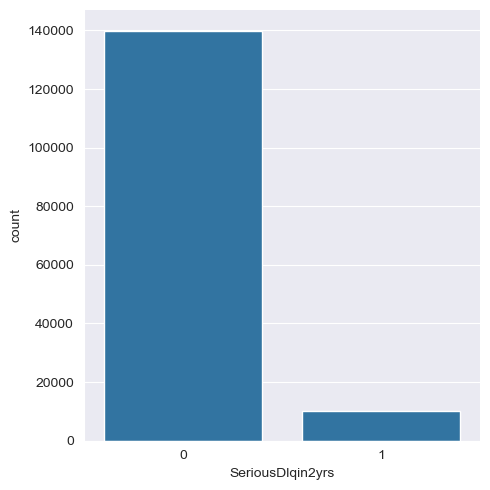

In [8]:
# overall distribution of defaulting consumers
sns.catplot(x='SeriousDlqin2yrs', kind='count', data=df,
            orient='h', height=5, aspect=1);

__This imbalance in the target variable will need to be addressed before creating a model.__

### Predictor Variables

#### RevolvingUtilizationOfUnsecuredLines
- Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits
- (total balance on CC + credit lines - real estate and car loans) / sum(credit limits)
- Lower = better, less overall credit balance 

In [9]:
df['RevolvingUtilizationOfUnsecuredLines'].describe()

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

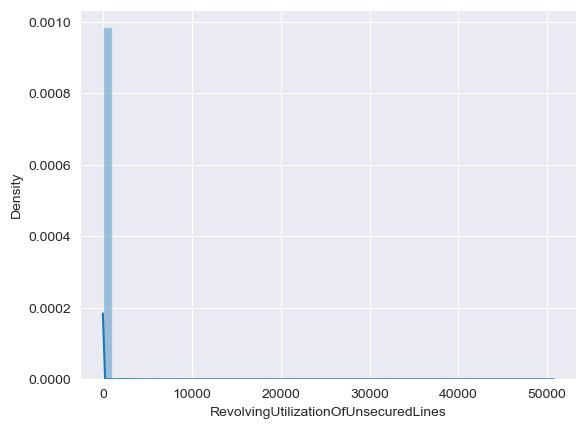

In [11]:
sns.distplot(df['RevolvingUtilizationOfUnsecuredLines']);

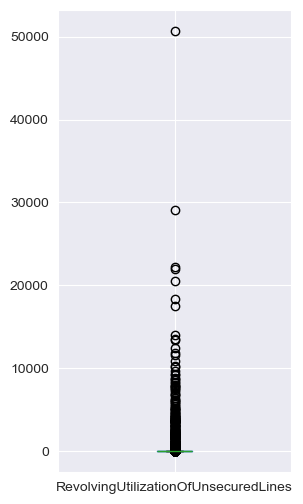

In [12]:
df.boxplot(column='RevolvingUtilizationOfUnsecuredLines', figsize=(3,6));

Very large outlier values as median is __0.15__ while the max values is ___>50000___.

Heavy right skew in distribution will need to be handled prior to modeling.

#### age

In [13]:
df['age'].describe()

count    150000.000000
mean         52.295207
std          14.771866
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

In [67]:
df['age'].value_counts().sort_index()

age
0        1
21     183
22     434
23     641
24     816
      ... 
102      3
103      3
105      1
107      1
109      2
Name: count, Length: 86, dtype: int64

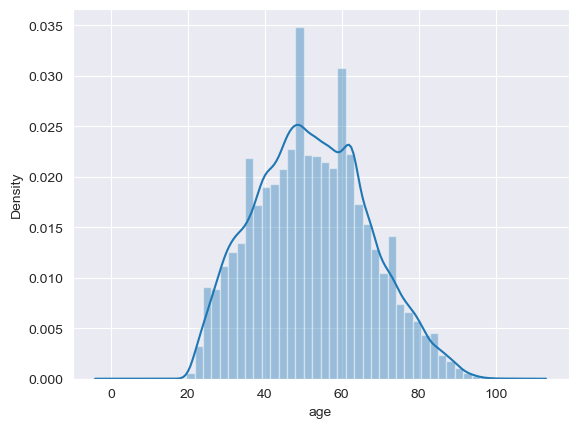

In [14]:
sns.distplot(df['age']);

Overall generally balanced distribution of ages.

AKA most likely won't require transformations during modeling.

In [71]:
df.loc[df['age']>100].shape

(13, 11)

#### NumberOfTime30-59DaysPastDueNotWorse

In [15]:
df['NumberOfTime30-59DaysPastDueNotWorse'].describe()

count    150000.000000
mean          0.421033
std           4.192781
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: float64

In [16]:
df['NumberOfTime30-59DaysPastDueNotWorse'].value_counts().sort_index()

NumberOfTime30-59DaysPastDueNotWorse
0     126018
1      16033
2       4598
3       1754
4        747
5        342
6        140
7         54
8         25
9         12
10         4
11         1
12         2
13         1
96         5
98       264
Name: count, dtype: int64

Heavy right skew, no values between 13-96 times.

#### NumberOfTime60-89DaysPastDueNotWorse

In [17]:
df['NumberOfTime60-89DaysPastDueNotWorse'].describe()

count    150000.000000
mean          0.240387
std           4.155179
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: float64

In [18]:
df['NumberOfTime60-89DaysPastDueNotWorse'].value_counts().sort_index()

NumberOfTime60-89DaysPastDueNotWorse
0     142396
1       5731
2       1118
3        318
4        105
5         34
6         16
7          9
8          2
9          1
11         1
96         5
98       264
Name: count, dtype: int64

Very similar skew to previous "days past" indicator (mostly zeroes, right skewed). Also similar pattern at the tail end of distribution (no values between 11-96 times).

#### NumberOfTimes90DaysLate

In [19]:
df['NumberOfTimes90DaysLate'].describe()

count    150000.000000
mean          0.265973
std           4.169304
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: NumberOfTimes90DaysLate, dtype: float64

In [20]:
df['NumberOfTimes90DaysLate'].value_counts().sort_index()

NumberOfTimes90DaysLate
0     141662
1       5243
2       1555
3        667
4        291
5        131
6         80
7         38
8         21
9         19
10         8
11         5
12         2
13         4
14         2
15         2
17         1
96         5
98       264
Name: count, dtype: int64

Again, we see a very similar skew. Now shows no values between 17-96 times.



#### Debt Ratio
- Monthly debt payments, alimony, living costs divided by monthly gross income.
- (debt + alimony + living costs) / (monthly gross income)
- lower = better, spending less money per income

In [21]:
df['DebtRatio'].describe()

count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max      329664.000000
Name: DebtRatio, dtype: float64

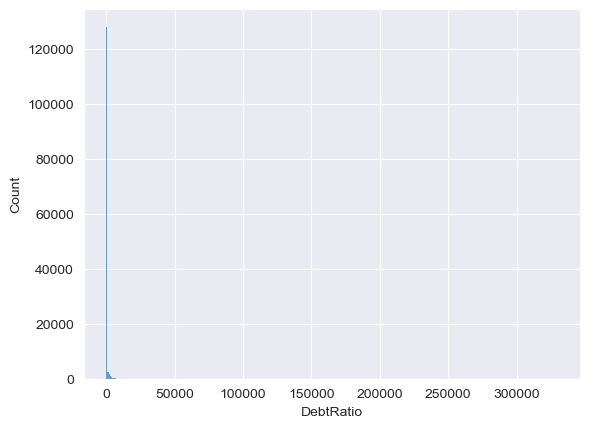

In [22]:
sns.histplot(df['DebtRatio'], bins=1000);

In [23]:
len(df.loc[df['DebtRatio']>1])

35137

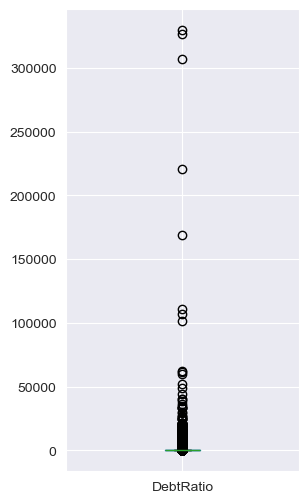

In [24]:
df.boxplot(column='DebtRatio', figsize=(3,6));

35137 consumers (2.3%) have more monthly debt payments than their monthly income.

Heavily right skewed distribution. Will need transforming before modeling.

#### MonthlyIncome

In [25]:
df['MonthlyIncome'].describe()

count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

In [77]:
df.loc[df['MonthlyIncome']>0].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,118635.000000,118635.000000,118635.000000,118635.000000,118635.000000,1.186350e+05,118635.000000,118635.000000,118635.000000,118635.000000,118635.000000
mean,0.069887,5.921964,51.330459,0.378809,5.291856,6.762092e+03,8.781843,0.208151,1.059173,0.184027,0.853500
std,0.254957,258.232417,14.388939,3.441782,199.774225,1.446194e+04,5.173281,3.406755,1.151601,3.389001,1.147771
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.035393,41.000000,0.000000,0.141496,3.500000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.178153,51.000000,0.000000,0.292454,5.437000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.580155,61.000000,0.000000,0.473289,8.300000e+03,11.000000,0.000000,2.000000,0.000000,2.000000
max,1.000000,50708.000000,103.000000,98.000000,61106.500000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


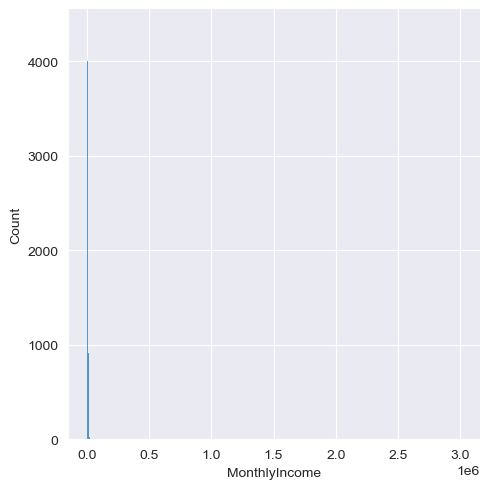

In [26]:
sns.displot(df['MonthlyIncome']);

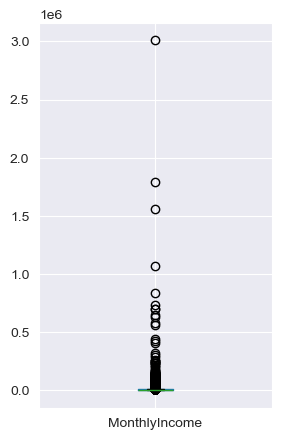

In [27]:
df.boxplot(column='MonthlyIncome', figsize=(3,5));

This feature has the most missing values (~20%) that will need to be imputed before modeling. 

Outliers may also need to be removed due to heavy right skew.

#### NumberOfOpenCreditLinesAndLoans
- Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)

In [28]:
df['NumberOfOpenCreditLinesAndLoans'].describe()

count    150000.000000
mean          8.452760
std           5.145951
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          58.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

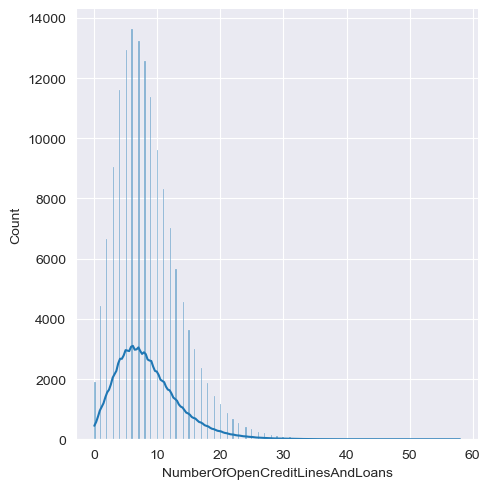

In [29]:
sns.displot(df['NumberOfOpenCreditLinesAndLoans'], kde=True);

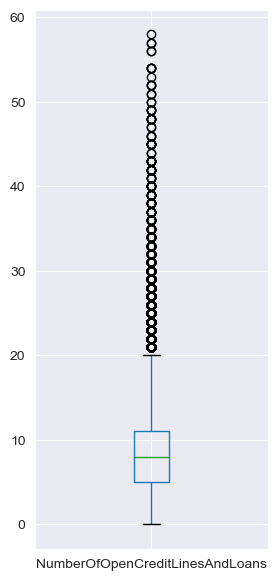

In [30]:
df.boxplot(column='NumberOfOpenCreditLinesAndLoans', figsize=(3,7));

Right skew, not as heavy as other variables. Outliers aren't as extreme either.

#### NumberOfDependents

In [31]:
df['NumberOfDependents'].describe()

count    146076.000000
mean          0.757222
std           1.115086
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: NumberOfDependents, dtype: float64

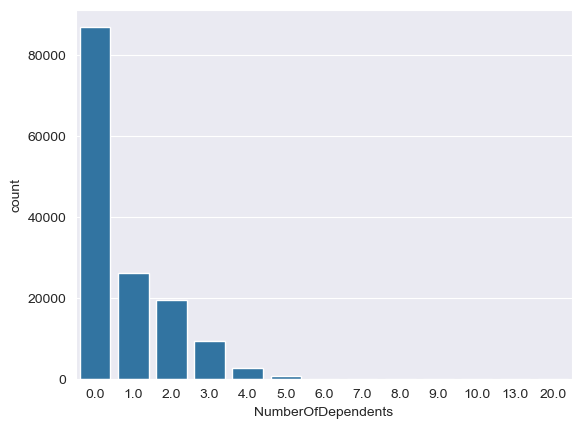

In [32]:
# sns.displot(df['NumberOfDependents']);
# ↑ didn't display much useful information due to outliers and binning
sns.countplot(x='NumberOfDependents', data=df);

In [33]:
df['NumberOfDependents'].value_counts().sort_index()

NumberOfDependents
0.0     86902
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
9.0         5
10.0        5
13.0        1
20.0        1
Name: count, dtype: int64

The only other variable with missing values that will need to be imputed prior to modeling.

Most likely 0-filled since mode and median are both 0.

#### NumberRealEstateLoansOrLines

In [79]:
df['NumberRealEstateLoansOrLines'].describe()

count    150000.000000
mean          1.018240
std           1.129771
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          54.000000
Name: NumberRealEstateLoansOrLines, dtype: float64

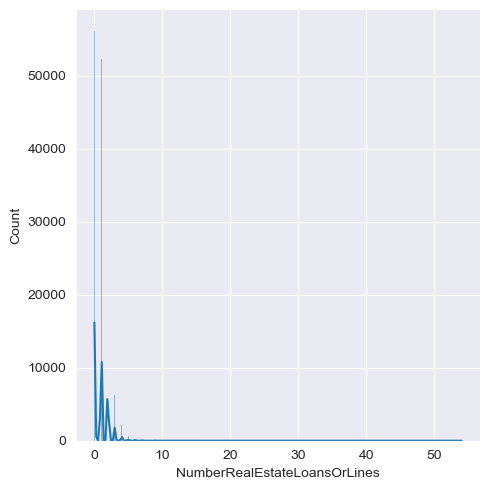

In [80]:
sns.displot(df['NumberRealEstateLoansOrLines'], kde=True);

In [81]:
df['NumberRealEstateLoansOrLines'].value_counts().sort_index()

NumberRealEstateLoansOrLines
0     56188
1     52338
2     31522
3      6300
4      2170
5       689
6       320
7       171
8        93
9        78
10       37
11       23
12       18
13       15
14        7
15        7
16        4
17        4
18        2
19        2
20        2
21        1
23        2
25        3
26        1
29        1
32        1
54        1
Name: count, dtype: int64

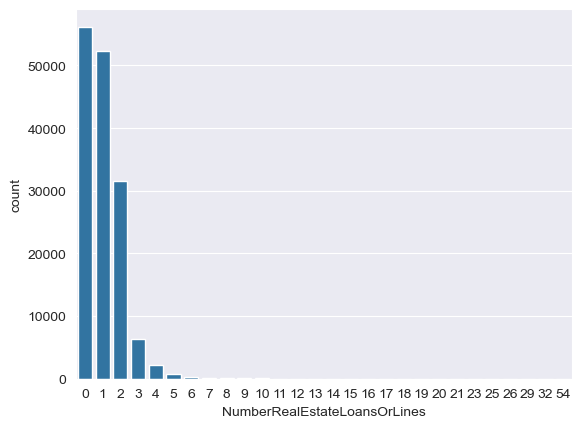

In [83]:
sns.countplot(x='NumberRealEstateLoansOrLines', data=df);

### Variable Relationship w/ Target Variable

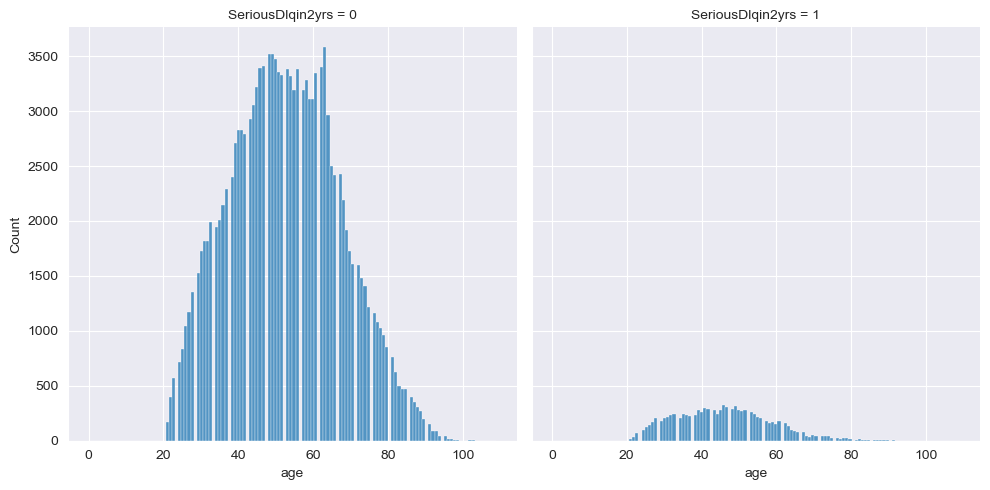

In [34]:
sns.displot(data=df, x='age', col='SeriousDlqin2yrs');

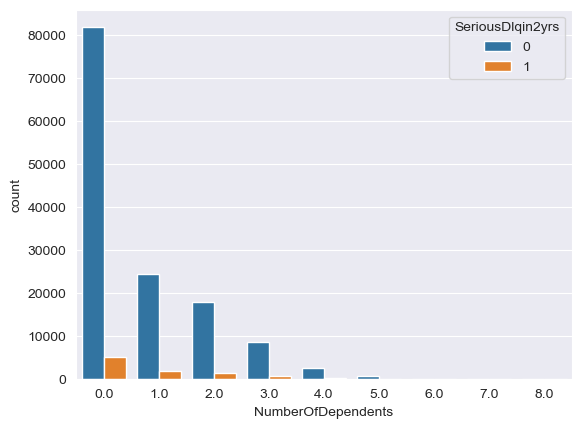

In [42]:
sns.countplot(x='NumberOfDependents', data=df.loc[df['NumberOfDependents']<9], hue='SeriousDlqin2yrs');

## Checking Correlation Between Variables

In [36]:
def corr_(df, n = 0.85, x = 1):
    '''
    
    Input - df: dataframe
            n: lower limit of correlation
            x: upper limit of correlation
            
    Output - dataframe with correlated pairs and correlation values
    
    '''
    df_cc=df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
    df_cc['pairs'] = list(zip(df_cc.level_0, df_cc.level_1))
    df_cc.set_index(['pairs'], inplace = True)
    df_cc.drop(columns=['level_1', 'level_0'], inplace = True)
    df_cc.columns = ['cc']
    df_cc.drop_duplicates(inplace=True)
    
    return df_cc[(df_cc['cc'] > n) & (df_cc['cc'] < x)]


In [39]:
corr_(df, n=0.8)

,cc
pairs,
"(NumberOfTime60-89DaysPastDueNotWorse, NumberOfTimes90DaysLate)",0.992796
"(NumberOfTime60-89DaysPastDueNotWorse, NumberOfTime30-59DaysPastDueNotWorse)",0.987005
"(NumberOfTimes90DaysLate, NumberOfTime30-59DaysPastDueNotWorse)",0.983603


No major correlation between the target variable and predictors.

Only columns with high degree of correlation are expected due to the nature of the values (all relating to number of times X days past due).

## How to Proceed with Null Values and Outliers

In [44]:
df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [56]:
find_outlier(df, 'DebtRatio')

Outlier range for DebtRatio:
	IQR: 0.6931799409999999
	Lower: -0.8646960792499998
	Upper: 1.9080236847499998


In [58]:
# determine data loss
pct_outlier = len(df.loc[df['DebtRatio'] > 1.90]) / len(df)
print(f"Rows removed: {len(df.loc[df['DebtRatio'] > 1.90])}")
print(f'Removing outliers results in {round(pct_outlier*100,2)}% data loss')

Rows removed: 31317
Removing outliers results in 20.88% data loss


Dropping upper quantile (75%) will result in too large of a data loss. Need to determine a different threshold.

In [60]:
df['DebtRatio'].quantile(0.95)

2449.0

In [65]:
quantiles = [0.9, 0.95, 0.975, 0.98, 0.99]
for q in quantiles:
    print(f'Results for {q} quantile:')
    upper_bound = df['DebtRatio'].quantile(q)
    print(f'Upper bound: {upper_bound}')
    pct_outlier = len(df.loc[df['DebtRatio'] >= upper_bound]) / len(df)
    print(f"Rows removed: {len(df.loc[df['DebtRatio'] > upper_bound])}\n")
    # print(f'Removing outliers results in {round(pct_outlier*100,2)}% data loss\n')

Results for 0.9 quantile:
Upper bound: 1267.0
Rows removed: 14995

Results for 0.95 quantile:
Upper bound: 2449.0
Rows removed: 7494

Results for 0.975 quantile:
Upper bound: 3489.024999999994
Rows removed: 3750

Results for 0.98 quantile:
Upper bound: 3839.0
Rows removed: 2999

Results for 0.99 quantile:
Upper bound: 4979.040000000037
Rows removed: 1500



In [45]:
find_outlier(df, 'RevolvingUtilizationOfUnsecuredLines')

Outlier range for RevolvingUtilizationOfUnsecuredLines:
	IQR: 0.5291788055
	Lower: -0.7639007662499999
	Upper: 1.35281445575


In [54]:
# determine data loss
pct_outlier = len(df.loc[df['RevolvingUtilizationOfUnsecuredLines'] > 1.35]) / len(df)
print(f"Rows removed: {len(df.loc[df['RevolvingUtilizationOfUnsecuredLines'] > 1.35])}")
print(f'Removing outliers results in {round(pct_outlier*100,2)}% data loss')

Rows removed: 765
Removing outliers results in 0.51% data loss


- Null values
    - MonthlyIncome:
        - large amount of nulls (~20%): cannot be dropped, will affect data by decreasing data points
        - heavy right skew: cannot be mean or median imputed, for simple solutions use mode imputation
    - NumberOfDependents:
        - relatively low number of nulls: could be dropped, but avoid if possible
        - right skew, not many unique values: can be mode imputed for simple solutions
- Outliers
    - NumberOfTimes90DaysLate: remove values > 17
        - determined based off of value_counts() results, showing large gap between 17 - 96
        - will result in 269 rows removed (0.17% of values)
    - RevolvingUtilizationOfUnsecuredLines: remove values > 1.35
        - will result in 765 rows removed (0.51% of values)
    - DebtRatio: remove values > 3839
        - determined based off of 98% quantile
        - will result in 2999 rows removed (2% of values)